# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Output file (CSV):
output_data_file='cities.csv'
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [66]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [67]:
# Set the API base URL
url =url='http://api.openweathermap.org/data/2.5/weather?'
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | auras
Processing Record 3 of Set 1 | alvaraes
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | rockport
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | kanungu
Processing Record 11 of Set 1 | tsiombe
Processing Record 12 of Set 1 | meulaboh
Processing Record 13 of Set 1 | portland
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | puerto aysen
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | komsomolets
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | qarauyl
Processing Record 22 of Set 1 | colonel hill
Processing Record 23 of

Processing Record 40 of Set 4 | el vigia
Processing Record 41 of Set 4 | roma
Processing Record 42 of Set 4 | kolyvan'
Processing Record 43 of Set 4 | chegdomyn
Processing Record 44 of Set 4 | aldan
Processing Record 45 of Set 4 | holualoa
Processing Record 46 of Set 4 | vredenburg
City not found. Skipping...
Processing Record 47 of Set 4 | port moresby
Processing Record 48 of Set 4 | peace river
Processing Record 49 of Set 4 | asaita
Processing Record 0 of Set 5 | vuktyl
Processing Record 1 of Set 5 | visakhapatnam
Processing Record 2 of Set 5 | bareilly
Processing Record 3 of Set 5 | san patricio
Processing Record 4 of Set 5 | east london
Processing Record 5 of Set 5 | abaza
Processing Record 6 of Set 5 | olonkinbyen
Processing Record 7 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 8 of Set 5 | walvis bay
Processing Record 9 of Set 5 | kununurra
Processing Record 10 of Set 5 | nova vicosa
Processing Record 11 of Set 5 | at taj
Processing Record 12 of Set 5 | por

Processing Record 30 of Set 8 | wynyard
Processing Record 31 of Set 8 | poltavka
Processing Record 32 of Set 8 | loango
Processing Record 33 of Set 8 | arroyo
Processing Record 34 of Set 8 | ilebo
Processing Record 35 of Set 8 | gamba
Processing Record 36 of Set 8 | calvi
Processing Record 37 of Set 8 | mbanza kongo
Processing Record 38 of Set 8 | borodulikha
Processing Record 39 of Set 8 | port lincoln
Processing Record 40 of Set 8 | santa vitoria
Processing Record 41 of Set 8 | jamiltepec
Processing Record 42 of Set 8 | puerto boyaca
Processing Record 43 of Set 8 | cockburn town
Processing Record 44 of Set 8 | barakani
Processing Record 45 of Set 8 | sawakin
Processing Record 46 of Set 8 | hiratacho
Processing Record 47 of Set 8 | medeiros neto
Processing Record 48 of Set 8 | alfredo v. bonfil
Processing Record 49 of Set 8 | sakaiminato
Processing Record 0 of Set 9 | borogontsy
Processing Record 1 of Set 9 | hasaki
Processing Record 2 of Set 9 | ringkobing
Processing Record 3 of Set 

Processing Record 16 of Set 12 | laojunmiao
Processing Record 17 of Set 12 | olivenza
Processing Record 18 of Set 12 | tanumah
Processing Record 19 of Set 12 | vila velha
Processing Record 20 of Set 12 | afega
Processing Record 21 of Set 12 | ouadda
Processing Record 22 of Set 12 | dauphin
Processing Record 23 of Set 12 | noumea
Processing Record 24 of Set 12 | charleston
Processing Record 25 of Set 12 | margate
Processing Record 26 of Set 12 | koungou
Processing Record 27 of Set 12 | santarem
Processing Record 28 of Set 12 | contamana
Processing Record 29 of Set 12 | antalaha
Processing Record 30 of Set 12 | langsa
Processing Record 31 of Set 12 | kalmunai
Processing Record 32 of Set 12 | sabzevar
Processing Record 33 of Set 12 | montanha
Processing Record 34 of Set 12 | crucecita
Processing Record 35 of Set 12 | leava
Processing Record 36 of Set 12 | pierre
Processing Record 37 of Set 12 | ta`u
Processing Record 38 of Set 12 | kuhmo
Processing Record 39 of Set 12 | xilin hot
Processi

In [68]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame.from_dict(city_data)


# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [69]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-22.79,100,96,1.12,RU,1702190391
1,auras,26.9167,80.5167,21.97,22,0,5.11,IN,1702190391
2,alvaraes,-3.2208,-64.8042,22.99,98,97,0.98,BR,1702190392
3,waitangi,-43.9535,-176.5597,10.46,95,100,1.34,NZ,1702190392
4,thompson,55.7435,-97.8558,-10.91,92,100,4.12,CA,1702190392


In [70]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-22.79,100,96,1.12,RU,1702190391
1,auras,26.9167,80.5167,21.97,22,0,5.11,IN,1702190391
2,alvaraes,-3.2208,-64.8042,22.99,98,97,0.98,BR,1702190392
3,waitangi,-43.9535,-176.5597,10.46,95,100,1.34,NZ,1702190392
4,thompson,55.7435,-97.8558,-10.91,92,100,4.12,CA,1702190392


In [71]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-22.79,100,96,1.12,RU,1702190391
1,auras,26.9167,80.5167,21.97,22,0,5.11,IN,1702190391
2,alvaraes,-3.2208,-64.8042,22.99,98,97,0.98,BR,1702190392
3,waitangi,-43.9535,-176.5597,10.46,95,100,1.34,NZ,1702190392
4,thompson,55.7435,-97.8558,-10.91,92,100,4.12,CA,1702190392


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

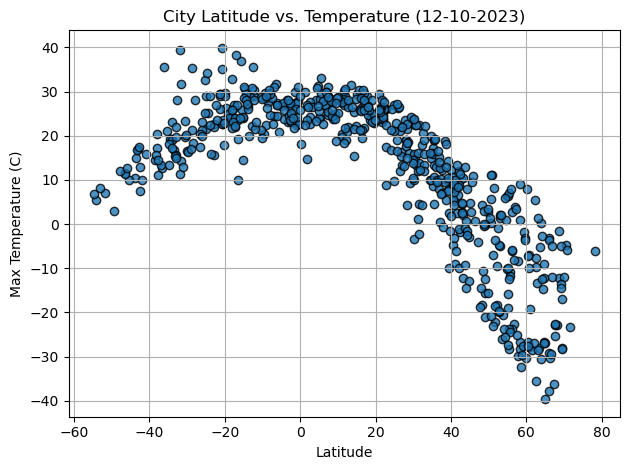

In [72]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")
date = datetime.now()
date = date.strftime("%m-%d-%Y")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

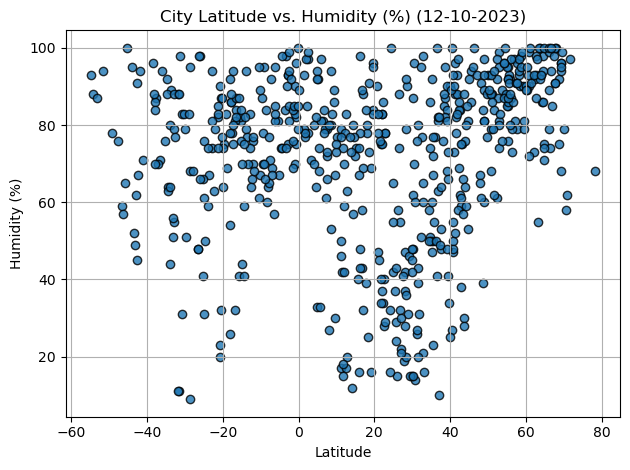

In [73]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")
date = datetime.now()
date = date.strftime("%m-%d-%Y")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

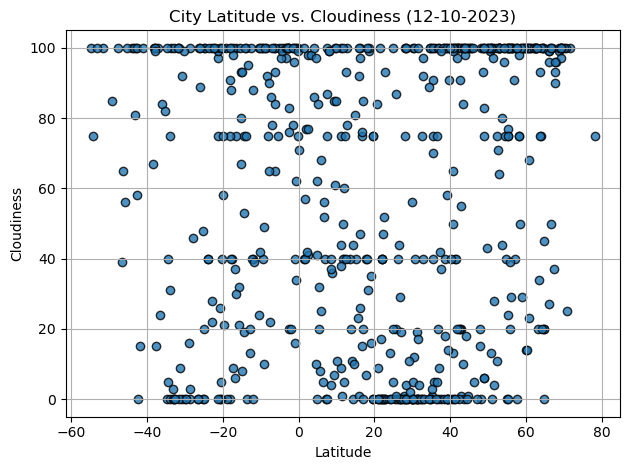

In [74]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")


# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

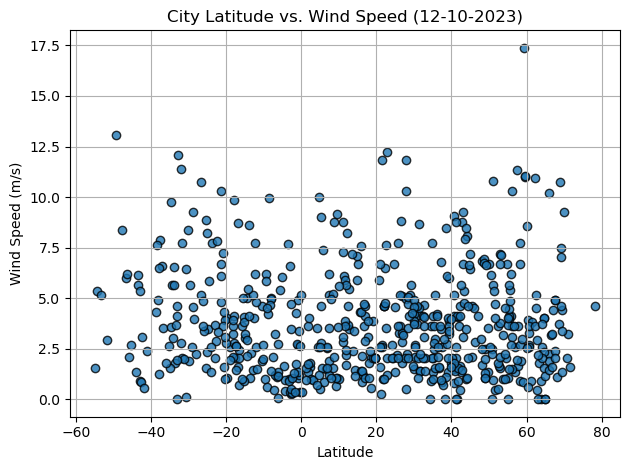

In [75]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")


# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-22.79,100,96,1.12,RU,1702190391
1,auras,26.9167,80.5167,21.97,22,0,5.11,IN,1702190391
4,thompson,55.7435,-97.8558,-10.91,92,100,4.12,CA,1702190392
7,rockport,28.0206,-97.0544,19.00,47,75,11.83,US,1702190392
11,meulaboh,4.1363,96.1285,28.04,80,86,3.50,ID,1702190393


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"])< 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,alvaraes,-3.2208,-64.8042,22.99,98,97,0.98,BR,1702190392
3,waitangi,-43.9535,-176.5597,10.46,95,100,1.34,NZ,1702190392
5,hermanus,-34.4187,19.2345,19.17,64,5,5.65,ZA,1702190392
6,port mathurin,-19.6833,63.4167,26.37,75,21,4.00,MU,1702190392
8,puerto natales,-51.7236,-72.4875,6.96,94,100,2.94,CL,1702190392


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.864897025922828
-----------------------------------
Observations about linear relationship:
The regression displays a negative relationship between temperature and latitude
In the northern hemisphere, as the latitude increases the distance from the equator increases
As you move away from the equator, the max temperature decreases.


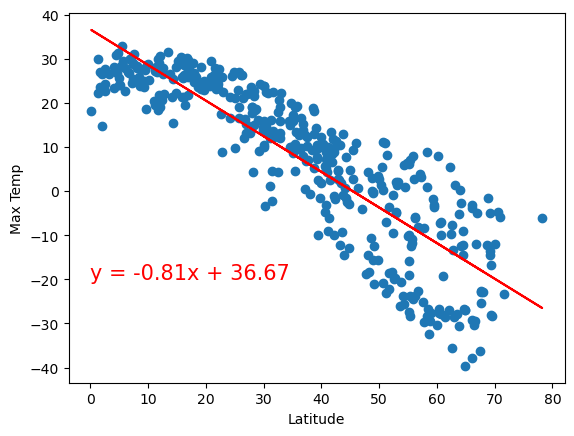

In [79]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The regression displays a negative relationship between temperature and latitude")
print("In the northern hemisphere, as the latitude increases the distance from the equator increases")
print("As you move away from the equator, the max temperature decreases.")

The r-value is 0.6374707702147651
Observations about linear relationship:
The regression displays a sligtly positive relationship between temperature and latitude.
In the southern hemisphere, as the latitude increases the distance from the equator decreases
As you move closer to the equator, the max temperature generally increases.


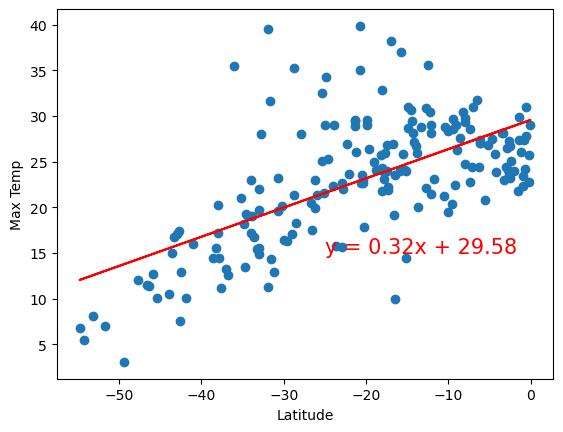

In [80]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("Observations about linear relationship:")
print("The regression displays a sligtly positive relationship between temperature and latitude.")
print("In the southern hemisphere, as the latitude increases the distance from the equator decreases")
print("As you move closer to the equator, the max temperature generally increases.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3751812263724965
-----------------------------------
Observations about linear relationship:
The relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude.


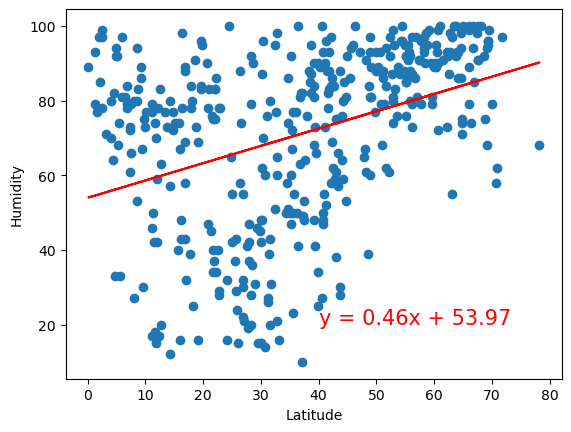

In [81]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude.")

The r-value is 0.13837628272354763
-----------------------------------
Observations about linear relationship:
The relationship is slightly positive.
Humidity increases as cities get closer to the equator.


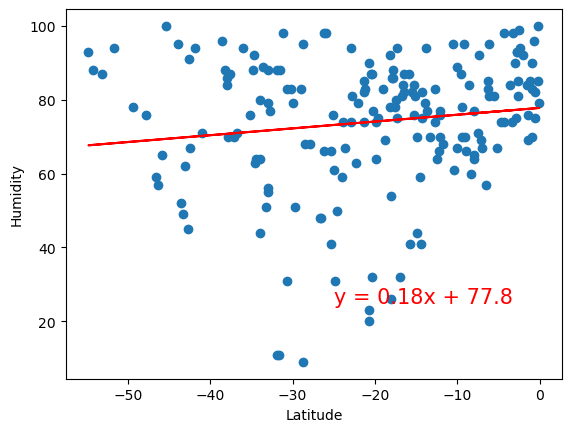

In [82]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The relationship is slightly positive.")
print("Humidity increases as cities get closer to the equator.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.29534278974301553
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and  cloudiness.


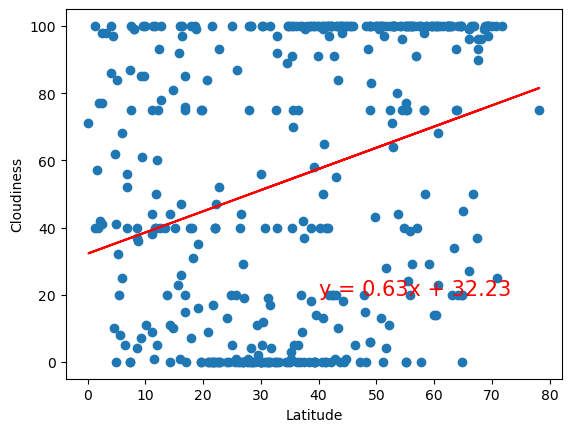

In [83]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and  cloudiness.")

The r-value is 0.11234391678008362
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and cloudiness.


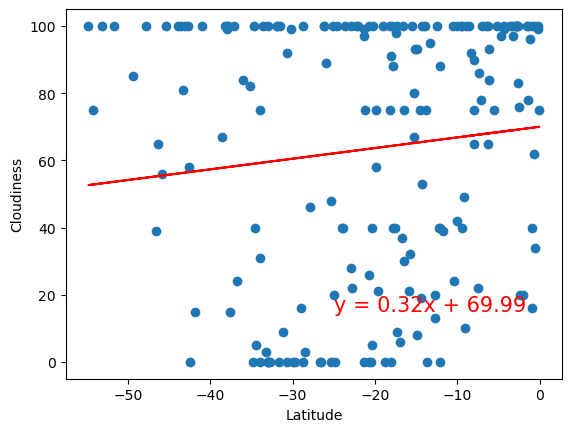

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and cloudiness.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.050982939847741826
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and wind speed.


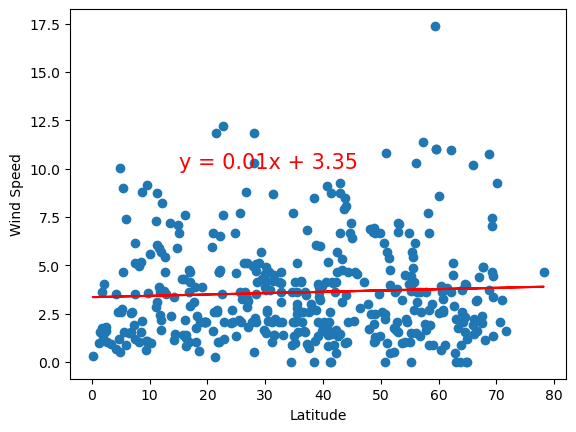

In [85]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and wind speed.")

The r-value is -0.26890220221891764
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and wind speed.


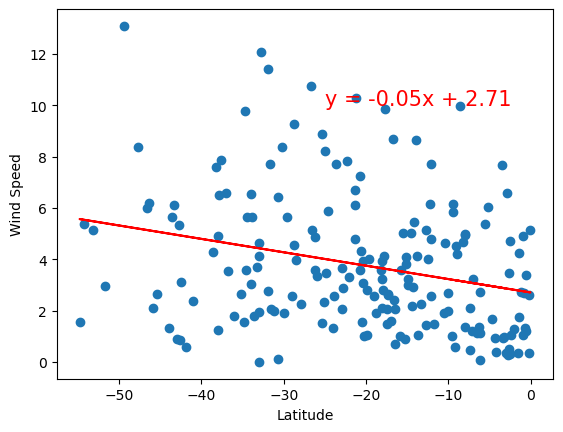

In [86]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and wind speed.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE